In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import linalg as LA
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [4]:
DATAFILE = './datasets/bodyfatmen.csv'
PATH_MULTICOL_PLOTS = './multicol_plots/'

In [10]:
df_body = pd.read_csv(DATAFILE)
df_y = df_body['density']
df_body.tail(20)

,density,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
228,1.0636,58,175.50,71.50,38.0,100.2,88.1,97.8,57.1,38.9,23.6,30.9,29.6,18.0
229,1.0384,58,161.75,67.25,35.1,94.9,94.9,100.2,56.8,35.9,21.0,27.8,26.1,17.6
230,1.0403,60,157.75,67.50,40.4,97.2,93.3,94.0,54.3,35.7,21.0,31.3,28.7,18.3
231,1.0563,62,168.75,67.50,38.3,104.7,95.6,93.7,54.4,37.1,22.7,30.3,26.3,18.3
232,1.0424,62,191.50,72.25,40.6,104.0,98.2,101.1,59.3,40.3,23.0,32.6,28.5,19.0
233,1.0372,63,219.15,69.50,40.2,117.6,113.8,111.8,63.4,41.1,22.3,35.1,29.6,18.5
234,1.0705,64,155.25,69.50,37.9,95.8,82.8,94.5,61.2,39.1,22.3,29.8,28.9,18.3
235,1.0316,65,189.75,65.75,40.8,106.4,100.5,100.5,59.2,38.1,24.0,35.9,30.5,19.1
236,1.0599,65,127.50,65.75,34.7,93.0,79.7,87.6,50.7,33.4,20.1,28.5,24.8,16.5
237,1.0207,65,224.50,68.25,38.8,119.6,118.0,114.3,61.3,42.1,23.4,34.9,30.1,19.4


In [6]:
df_y.tail(5)

243    1.0736
244    1.0236
245    1.0328
246    1.0399
247    1.0271
Name: density, dtype: float64

## I -Simple analysis

### I.1. Multicollinearity diagnostics and treatments.

In [12]:
df_body.corr()

,density,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
density,1.000000,-0.292170,-0.614712,0.013399,-0.496096,-0.706127,-0.812813,-0.620800,-0.555778,-0.510574,-0.264546,-0.492086,-0.365266,-0.362697
age,-0.292170,1.000000,-0.013295,-0.252471,0.113228,0.178757,0.234927,-0.051717,-0.202088,0.016761,-0.102080,-0.039038,-0.086114,0.209858
weight,-0.614712,-0.013295,1.000000,0.481665,0.832173,0.892192,0.887794,0.943481,0.871166,0.851990,0.613561,0.801363,0.626478,0.734500
height,0.013399,-0.252471,0.481665,1.000000,0.313276,0.214511,0.186642,0.373692,0.345595,0.497857,0.398591,0.321942,0.315541,0.383182
neck,-0.496096,0.113228,0.832173,0.313276,1.000000,0.783565,0.756410,0.744423,0.704817,0.677473,0.477084,0.731845,0.619421,0.745489
chest,-0.706127,0.178757,0.892192,0.214511,0.783565,1.000000,0.916183,0.830798,0.729803,0.717158,0.480504,0.726893,0.574818,0.662774
abdomen,-0.812813,0.234927,0.887794,0.186642,0.756410,0.916183,1.000000,0.874254,0.763586,0.735772,0.449210,0.682019,0.499562,0.629584
hip,-0.620800,-0.051717,0.943481,0.373692,0.744423,0.830798,0.874254,1.000000,0.894364,0.820504,0.559534,0.741930,0.545308,0.644363
thigh,-0.555778,-0.202088,0.871166,0.345595,0.704817,0.729803,0.763586,0.894364,1.000000,0.798465,0.538937,0.762771,0.568316,0.576245
knee,-0.510574,0.016761,0.851990,0.497857,0.677473,0.717158,0.735772,0.820504,0.798465,1.000000,0.614049,0.681113,0.554681,0.671552


### CORRELATION MATRIX

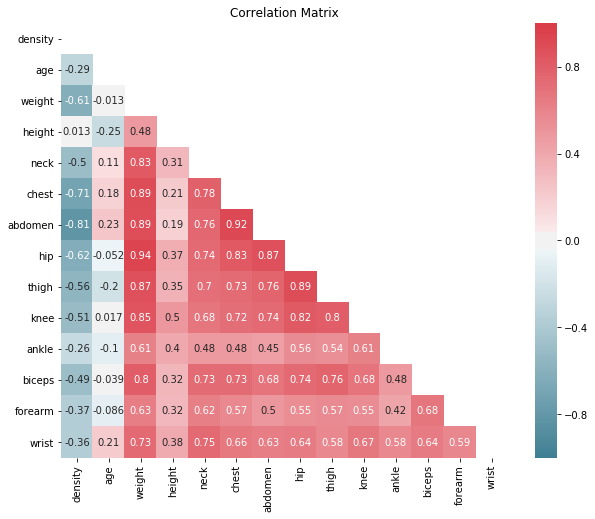

In [16]:
fig, ax = plt.subplots(figsize = [10,8])

corr = df_body.corr(method = 'Pearson')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Color Map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax = sns.heatmap(corr,annot=True, ax = ax, vmin=-1, vmax=1, cmap=cmap, mask=mask)
ax.set_title('Correlation Matrix')
plt.show()

Above we have compute the correlation matrix shows a lot of dependencies between the features. In particular, we can focus on: 

 ** abdomen && chest : Cov_normalized( adbdomen, chest ) = 0.92 > check plot LINEAR
 
 ** hip  && weight: Cov_normalized( hip, weight ) = 0.94 > check plot LINEAR
 
 ** chest  && weight: Cov_normalized( chest, weight ) = 0.89 > check plot LINEAR
 
 ** abdomen  && weight: Cov_normalized( abdomen, weight ) = 0.89 > check plot LINEAR 
 
 
The inspection of the correlation matrix indicates that there are several near- l inear dependencies in the body_fat data

### METHOD WITH EIGEN VALUES: 
We are going to compute X'X and find the eigen values for this matrix. The more correlated are the columns of such matrix the 'less' it is invertible. And hence we can expect the estimated coefficients of our regression model to inflate as shown in the course notes. The idea behind eigen values analysis is just that if we have null eigen values then our matrix is not of full rank and hence cannot be inverted. 

So, we are going to compute the ratio k = lambda_max/lambda_min to see if we are in a case with multicolinearity. 

Recall that:
<ul>
<li> 1/ if k > 1000 then Strong multicol
<li>2/ if 100 < k < 1000 then moderate multicol
<li>3 if k < 100 no multicol: OK!
            </ul>

In [11]:
df_body.tail(5)

,density,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
243,1.0736,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
244,1.0236,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
245,1.0328,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
246,1.0399,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
247,1.0271,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


In [12]:
df_body_features = df_body.drop('density', axis = 1)
df_body_features.tail(5)

,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
243,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
244,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
245,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
246,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
247,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


In [13]:
X = df_body_features.values 
X_trans = X.T
data_mat = np.dot(X_trans, X)
eigen_values, _ = LA.eig(data_mat)

In [14]:
eigen_values

array([1.92797151e+07, 6.27964975e+04, 2.99341142e+04, 4.99295985e+03,
       2.45269472e+03, 1.45123648e+03, 9.10547039e+02, 6.18838148e+01,
       2.51877940e+02, 6.18151397e+02, 3.71825283e+02, 4.70574024e+02,
       4.28055316e+02])

In [15]:
k_ratio = eigen_values.max()/ eigen_values.min()

In [17]:
def normalization(col, kind='mean'):
    """
    Normalize a column col with kind method
    """
    if kind == 'mean':
        return (col-col.mean())/col.std()
    elif kind == 'min-max':
        return col/(col.max()-col.min())

def normalize_data(df_features = df_body_features, kind = 'mean'):
    df_feat_norm = df_features.apply(lambda col: normalization(col), axis = 0 )
    return df_feat_norm

In [18]:
df_feat_norm = normalize_data(df_body_features)

In [19]:
def typeColinearity(df_features = df_body_features):
    """
    Computes eigen values of the matrix X'X and evaluate the ratio 
    between maximal and lowest eigen values
    @return eigen values, eigen vectors and ratios btw lambda_max and other lambdas among eigen values
    """
    X = df_features.values 
    X_trans = X.T
    data_mat = np.dot(X_trans, X)
    eigen_values, eigen_vectors = LA.eig(data_mat)
    k = eigen_values.max()/ eigen_values.min()
    k_ratios = [eigen_values.max()/eigen_value for eigen_value in eigen_values if eigen_value != eigen_values.max()]
    if k > 1000: 
        print ('Strong multicolinearity \n')
    elif 100 < k < 1000: 
        print ('Moderate multicolinearity \n')
    else:
        print ('No multicolinearity \n')
    print("Eigen values of X'X: {}".format(eigen_values))
    return eigen_values, eigen_vectors, k_ratios 

In [20]:
eigen_values, eigen_vectors, k_ratios = typeColinearity(df_feat_norm)

Moderate multicolinearity 

Eigen values of X'X: [2016.57302472  356.40149808  211.30871496  168.42880326  136.41959683
   78.98651385    4.57779615   13.46683943   18.34897799   33.08782386
   45.69651231   67.12061798   60.58328058]


In [21]:
## ratios between largest eigenvalue and other eigenvalues 
k_ratios

[5.658149686732533,
 9.543255350690995,
 11.972851351288261,
 14.782135936132205,
 25.530599166032157,
 440.5117566124644,
 149.7436006202052,
 109.9011087111865,
 60.94607591557638,
 44.129692238485,
 30.044017553412523,
 33.28596611823295]

In [140]:
k_ratios.sort()

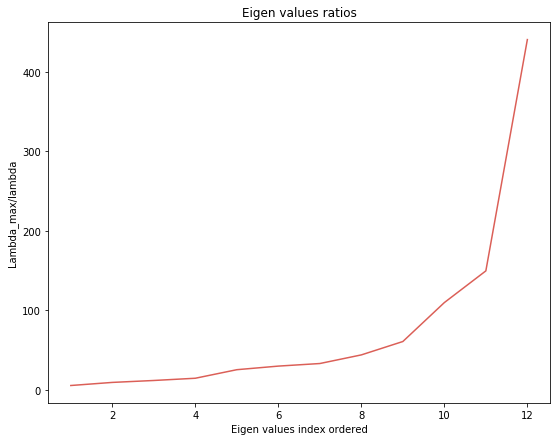

In [143]:
## PLOT OF RATIOS 

fig=plt.figure(figsize = (9,7))
eigen_index = list(range(1,len(k_ratios)+1))
plt.plot(eigen_index, k_ratios)
plt.xlabel('Eigen values index ordered')
plt.ylabel('Lambda_max/lambda')
plt.title('Eigen values ratios')
plt.savefig(PATH_MULTICOL_PLOTS+'ratios_eigenvalues.png', bbox_inches='tight')
plt.show()            

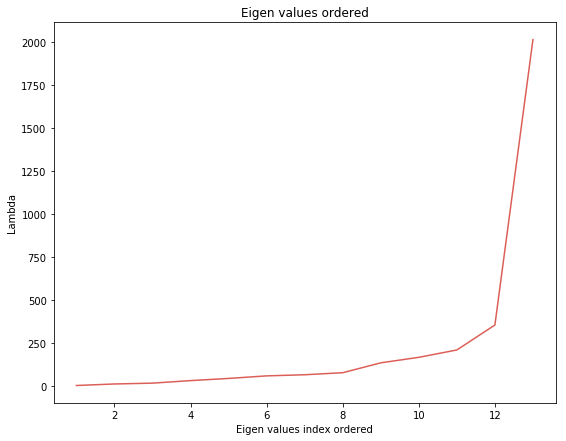

In [144]:
## PLOT OF EIGEN VALUES 

eigen_values.sort()
fig=plt.figure(figsize = (9,7))
eigen_index = list(range(1,len(eigen_values)+1))
plt.plot(eigen_index, eigen_values)
plt.xlabel('Eigen values index ordered')
plt.ylabel('Lambda')
plt.title('Eigen values ordered')
plt.savefig(PATH_MULTICOL_PLOTS+'eigenvalues.png', bbox_inches='tight')
plt.show()            

The small eigenvalue indicates the near- l inear dependence in the data. But here the smallest eigen values is 4.55 after standardization of our data by bringing the features with 0 mean and std of 1. 

We are a bit surprised by that as our correlation matrix seemed to shed light on a clear correlation between some of the columns meaning that X'X should not be of full rank and hence should have very low eigen values. 

### Variance inflation factor 

Let us focus on the features we have seen as proabably linked to the other features. We will fit linear models to see wheter they are linked to one another. 

We begin with abdomen that is supposed to be linearly linked to chest. 

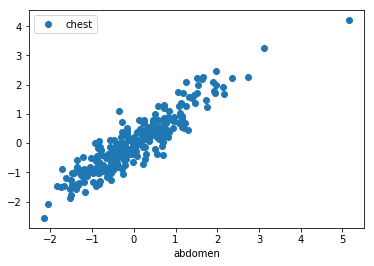

In [95]:
### PLOT abdomen vs chest
feat_abdomen = df_feat_norm['abdomen'].values.reshape(-1,1)
feat_chest = df_feat_norm['chest'].values.reshape(-1,1)

df_feat_norm.plot(x='abdomen', y='chest', style='o')

In [125]:

# x = feat_abdomen, y = feat_chest
reg = LinearRegression().fit(feat_abdomen, feat_chest)
score, coef, intercept  = reg.score(feat_abdomen, feat_chest), reg.coef_, reg.intercept_

print('Score linear regression chest vs abdomen: {} \n Coefficients:{} \n  Intercept: {} \n'.format(score, coef, intercept))

Score linear regression chest vs abdomen: 0.8393921511676667 
 Coefficients:[[0.91618347]] 
  Intercept: [-8.3803479e-15] 



<Figure size 432x288 with 0 Axes>

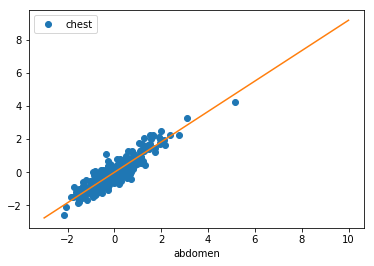

In [114]:
# y = coef[0,0]x + intercept[0]
fig = plt.figure()


x = np.linspace(-3, 10, 1000)
ax = df_feat_norm.plot(x='abdomen', y='chest', style='o')
ax.plot(x, coef[0,0]*x + intercept[0])


Comments: we clearly see that Abdomen and chest are linearly dependent so we can remove one of the features from our dataset. 

In [119]:
# More general:  we fit chest with the other features 
feat_others_chest = df_feat_norm.drop('chest', axis = 1).values
reg = LinearRegression().fit(feat_others_chest, feat_chest)
score, coef, intercept = reg.score(feat_others_chest, feat_chest), reg.coef_, reg.intercept_

In [120]:
coef

array([[ 0.01291835,  0.98446678, -0.18667385, -0.01094192,  0.40113701,
        -0.23822031, -0.17119101, -0.0157598 , -0.01644568,  0.03242099,
         0.05512648, -0.01676953]])

We can write : x_chest = 0.98*x_weight - 0.18*x_height + 0.4 * x_abdomen - 0.23*x_hip + 0.17*x_thigh 
    by neglecting the other terms 

Let us check how is the projection of x_chest on one direction according to the weight feature only. 

In [30]:
# x = feat_weight, y = feat_chest

feat_weight = df_feat_norm['weight'].values.reshape(-1,1)
reg = LinearRegression().fit(feat_weight, feat_chest)
score, coef, intercept  = reg.score(feat_weight, feat_chest), reg.coef_, reg.intercept_

print('Score linear regression weight vs abdomen: {} \n Coefficients:{} \n  Intercept: {} \n'.format(score, coef, intercept))

Score linear regression weight vs abdomen: 0.7960060277348159 
 Coefficients:[[0.8921917]] 
  Intercept: [-5.34723153e-15] 



<Figure size 432x288 with 0 Axes>

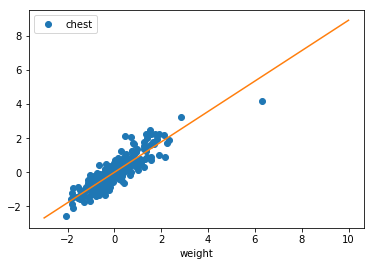

In [31]:
# y = coef[0,0]x + intercept[0]
fig = plt.figure()


x = np.linspace(-3, 10, 1000)
ax = df_feat_norm.plot(x='weight', y='chest', style='o')
ax.plot(x, coef[0,0]*x + intercept[0])
plt.savefig(PATH_MULTICOL_PLOTS+'chest_vs_weight.png', bbox_inches='tight')
plt.show()

It is interesting to notice that the feature chest can also be represented as linear relationship with feature weight. 

Let us check how is the projection of x_chest on one direction according to the hip feature only.

In [139]:
# x = feat_hip, y = feat_chest

feat_hip = df_feat_norm['hip'].values.reshape(-1,1)
reg = LinearRegression().fit(feat_hip, feat_chest)
score, coef, intercept  = reg.score(feat_hip, feat_chest), reg.coef_, reg.intercept_

print('Score linear regression hip vs abdomen: {} \n Coefficients:{} \n  Intercept: {} \n'.format(score, coef, intercept))

Score linear regression hip vs abdomen: 0.6902252092524324 
 Coefficients:[[0.83079794]] 
  Intercept: [-1.10802553e-14] 



<Figure size 432x288 with 0 Axes>

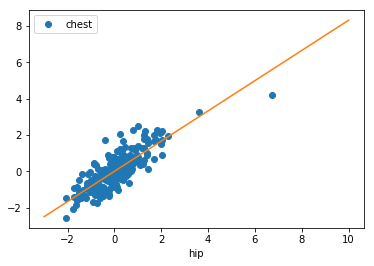

In [140]:
# y = coef[0,0]x + intercept[0]
fig = plt.figure()


x = np.linspace(-3, 10, 1000)
ax = df_feat_norm.plot(x='hip', y='chest', style='o')
ax.plot(x, coef[0,0]*x + intercept[0])


It is interesting to notice that the feature chest can also be represented as linear relationship with feature hip. 

In [17]:
# x = feat_height, y = feat_chest

feat_height = df_feat_norm['height'].values.reshape(-1,1)
feat_chest = df_feat_norm['chest'].values.reshape(-1,1)
reg = LinearRegression().fit(feat_height, feat_chest)
score, coef, intercept  = reg.score(feat_height, feat_chest), reg.coef_, reg.intercept_

print('Score linear regression chest vs height: {} \n Coefficients:{} \n  Intercept: {} \n'.format(score, coef, intercept))

Score linear regression chest vs height: 0.04601501353159465 
 Coefficients:[[0.2145111]] 
  Intercept: [-6.56801947e-15] 



<Figure size 432x288 with 0 Axes>

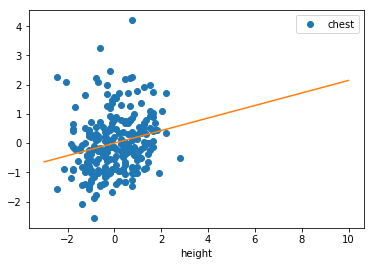

In [18]:
# y = coef[0,0]x + intercept[0]
fig = plt.figure()


x = np.linspace(-3, 10, 1000)
ax = df_feat_norm.plot(x='height', y='chest', style='o')
ax.plot(x, coef[0,0]*x + intercept[0])


Comments: We clearly see the linear relationship is at least not direct btw chest and height 
Cov (chest, height) = 0.19


In [21]:
# x = feat_thigh, y = feat_chest

feat_thigh = df_feat_norm['thigh'].values.reshape(-1,1)
feat_chest = df_feat_norm['chest'].values.reshape(-1,1)
reg = LinearRegression().fit(feat_height, feat_chest)
score, coef, intercept  = reg.score(feat_thigh, feat_chest), reg.coef_, reg.intercept_

print('Score linear regression chest vs thigh: {} \n Coefficients:{} \n  Intercept: {} \n'.format(score, coef, intercept))

Score linear regression chest vs thigh: 0.2670867555344828 
 Coefficients:[[0.2145111]] 
  Intercept: [-6.56801947e-15] 



<Figure size 432x288 with 0 Axes>

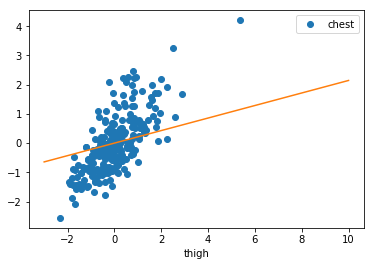

In [22]:
# y = coef[0,0]x + intercept[0]
fig = plt.figure()


x = np.linspace(-3, 10, 1000)
ax = df_feat_norm.plot(x='thigh', y='chest', style='o')
ax.plot(x, coef[0,0]*x + intercept[0])


In [ ]:
Comments: It comes also unlikely to state a direct linear relationship btw chest and thigh.
Recall: Cov(thigh, chest) = 0.73

Perhaps it could be interesting to do a pairwise analysis btw chest, weight, abdomen and hip.

Recall that abdomen  && weight present the following covariance: Cov_normalized( abdomen, weight ) = 0.89
    
    So they might be linked also linearly

In [32]:
# x = feat_weight, y = feat_abdomen


feat_weight = df_feat_norm['weight'].values.reshape(-1,1)
reg = LinearRegression().fit(feat_weight, feat_abdomen)
score, coef, intercept  = reg.score(feat_weight, feat_abdomen), reg.coef_, reg.intercept_

print('Score linear regression weight vs abdomen: {} \n Coefficients:{} \n  Intercept: {} \n'.format(score, coef, intercept))

Score linear regression weight vs abdomen: 0.7881781636136861 
 Coefficients:[[0.88779399]] 
  Intercept: [3.24467304e-15] 



<Figure size 432x288 with 0 Axes>

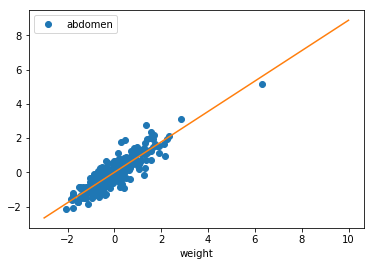

In [33]:
# y = coef[0,0]x + intercept[0]
fig = plt.figure()


x = np.linspace(-3, 10, 1000)
ax = df_feat_norm.plot(x='weight', y='abdomen', style='o')
ax.plot(x, coef[0,0]*x + intercept[0])
plt.savefig(PATH_MULTICOL_PLOTS+'abdomen_vs_weight.png', bbox_inches='tight')
plt.show()


So we see that abdomen and weight are also linked linearly. 

Now we can check how things are going on between hip and weight.
Recall that:  hip && weight: Cov_normalized( hip, weight ) = 0.94 

In [13]:
## PLOT HIP vs WEIGHT
# x = feat_weight, y = feat_hip 

feat_weight = df_feat_norm['weight'].values.reshape(-1,1)
feat_hip =  df_feat_norm['hip'].values.reshape(-1,1)
reg = LinearRegression().fit(feat_weight, feat_hip)
score, coef, intercept  = reg.score(feat_weight, feat_hip), reg.coef_, reg.intercept_

print('Score linear regression weight vs hip: {} \n Coefficients:{} \n  Intercept: {} \n'.format(score, coef, intercept))

Score linear regression weight vs hip: 0.8901556480187627 
 Coefficients:[[0.9434806]] 
  Intercept: [6.8006706e-15] 



<Figure size 432x288 with 0 Axes>

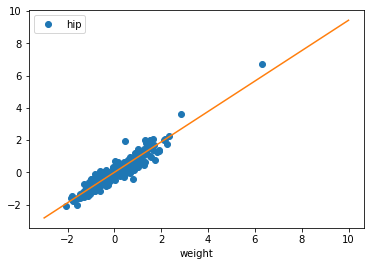

In [14]:
# y = coef[0,0]x + intercept[0]
fig = plt.figure()


x = np.linspace(-3, 10, 1000)
ax = df_feat_norm.plot(x='weight', y='hip', style='o')
ax.plot(x, coef[0,0]*x + intercept[0])


Comments: So again a linear relationship links hip feature and weight 

#### IDEA: We will check pairwise plots:
<ul>
<li> x_chest vs x_weight 
<li>x_weight vs abdomen 
<li>x_abdomen vs hip 
</ul>

By transitivity we could conclude that those features are linearly linked two by two.

In [24]:
## PLOT HIP vs WEIGHT
# x = feat_abdomen, y = feat_hip 

feat_abdomen = df_feat_norm['abdomen'].values.reshape(-1,1)
feat_hip =  df_feat_norm['hip'].values.reshape(-1,1)
reg = LinearRegression().fit(feat_weight, feat_hip)
score, coef, intercept  = reg.score(feat_abdomen, feat_hip), reg.coef_, reg.intercept_

print('Score linear regression abdomen vs hip: {} \n Coefficients:{} \n  Intercept: {} \n'.format(score, coef, intercept))

Score linear regression abdomen vs hip: 0.759527763221022 
 Coefficients:[[0.9434806]] 
  Intercept: [6.8006706e-15] 



<Figure size 432x288 with 0 Axes>

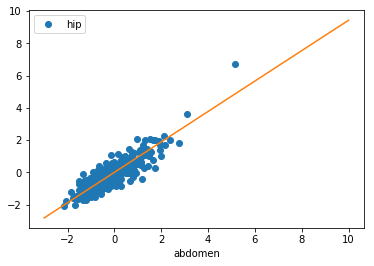

In [29]:
# y = coef[0,0]x + intercept[0]
fig = plt.figure()


x = np.linspace(-3, 10, 1000)
ax = df_feat_norm.plot(x='abdomen', y='hip', style='o')
ax.plot(x, coef[0,0]*x + intercept[0])
plt.savefig(PATH_MULTICOL_PLOTS+'hip_vs_abdomen.png', bbox_inches='tight')
plt.show()

In [49]:
from pylab import imread,subplot,imshow,show

### SUMMARY PLOTS MULTICOLINEARITY

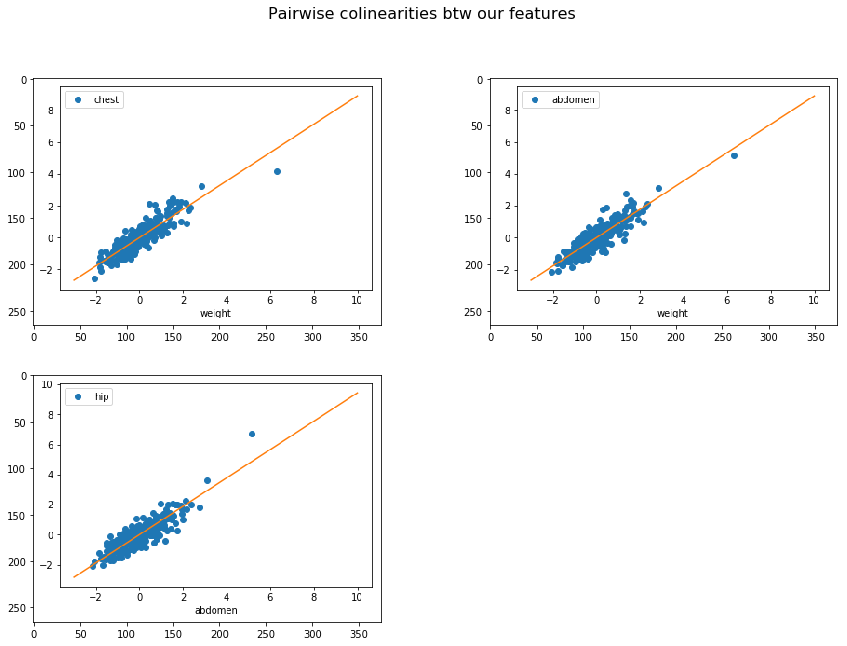

In [50]:
# SUMMARY PLOTS MULTICOLINEARITY

fig=plt.figure(figsize = (15,10))
files = ['chest_vs_weight.png','abdomen_vs_weight.png','hip_vs_abdomen.png']
path_files = [PATH_MULTICOL_PLOTS + file for file in files]

for i in range(0,3):
    image = imread(path_files[i])
    ax=fig.add_subplot(2,2,i+1)        
    ax.imshow(image)

fig.suptitle('Pairwise colinearities btw our features', fontsize = 16) # or plt.suptitle('Main title')
plt.savefig(PATH_MULTICOL_PLOTS+'three_plots_coli.png', bbox_inches='tight')
plt.show()


Comments: Those 4 features (chest, weight, abdomen and hip) are hence linearly linked two by two. And an interesting strategy could be to reduce our dimensions by using only one of those features instead of all of them as in the original dataset. 

### REDUCED MODEL vs FULL MODEL: removing 3 features in our dataset

##### Let's fit the model with 13 dimensions including all of the four analysed features and fit the model in 10 dimensions including only one of the previously analysed feature 

In [44]:
df_feat_norm.tail(5)

,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
243,1.991605,-1.522829,-1.274438,-1.279591,-1.384161,-0.832631,-1.554651,-1.878749,-1.568625,-0.946177,-2.208266,-1.465471,0.295529
244,2.149760,0.754666,-0.208630,1.191572,0.911853,1.152072,0.652045,0.038657,0.927487,0.052092,0.959821,-0.034229,2.017492
245,2.149760,0.268459,-1.662005,0.367851,1.221160,1.754902,0.258494,0.172876,-0.528579,-0.946177,-0.327215,-0.725173,-0.242585
246,2.149760,0.404938,0.082045,0.367851,0.888060,0.808922,-0.289666,-0.651609,1.260302,-0.241517,-0.591222,0.360597,1.694624
247,2.307915,0.976445,-0.111738,1.150386,1.375814,1.476673,1.017486,-0.018865,1.509913,0.874195,0.464807,0.656716,2.878474


In [46]:
## Fit model with all features 
# X = all features except y with y = df_y density 

feat_all = df_feat_norm.values
feat_y =  df_y.values.reshape(-1,1)
reg = LinearRegression().fit(feat_all, feat_y)
score, coef, intercept  = reg.score(feat_all, feat_y), reg.coef_, reg.intercept_

print('Score linear regression full model: {} \n Coefficients:{} \n  Intercept: {} \n'.format(score, coef, intercept))

Score linear regression full model: 0.7451421990982033 
 Coefficients:[[-1.66886803e-03  6.96821982e-03 -6.69424020e-05  2.60170577e-03
   9.82251925e-05 -2.37171284e-02  3.74792696e-03 -3.30795553e-03
  -8.21682879e-05 -7.57587423e-04 -1.29495986e-03 -2.10779555e-03
   3.39248150e-03]] 
  Intercept: [1.05543306] 



#### Now we focus on all features except weight, abdomen and hip. We let chest feature representing all four features as seen previously.

In [48]:
## Fit model with Reduced Model 
# X = all features except y with y = df_y density 

feat_partial = df_feat_norm.drop(['weight', 'abdomen', 'hip'], axis = 1).values
feat_y =  df_y.values.reshape(-1,1)
reg = LinearRegression().fit(feat_partial, feat_y)
score, coef, intercept  = reg.score(feat_partial, feat_y), reg.coef_, reg.intercept_

print('Score linear regression Reduced Model: {} \n Coefficients:{} \n  Intercept: {} \n'.format(score, coef, intercept))

Score linear regression Reduced Model: 0.6135259670113831 
 Coefficients:[[-0.00585745  0.00191491  0.0021446  -0.01099133 -0.0074277  -0.00085148
   0.00012454  0.00042612 -0.00137883  0.00465573]] 
  Intercept: [1.05543306] 



Comments: We have R**2(FM) = 0.745 > R**2(RM) = 0.613 where recall that R**2 == SSr/SSt and is 1 when we have a strong linear dependencie

###  General linear hypothesis: F statistic

In [51]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### FULL MODEL

In [66]:
df_feat_norm_ones = df_feat_norm.copy(deep = True)## add ones to data for model fitting only
ones = [1 for i in range(df_feat_norm.shape[0])]
df_feat_norm_ones.insert(0, 'ones', ones) ## insert column one ones in first column

model = smf.OLS(endog = df_y, exog = df_feat_norm_ones, hasconst = True).fit()
model.params
#model = sm.OLS(endog=y, exog=x_with_ones, hasconst=hc).fit()

ones       1.055433
age       -0.001669
weight     0.006968
height    -0.000067
neck       0.002602
chest      0.000098
abdomen   -0.023717
hip        0.003748
thigh     -0.003308
knee      -0.000082
ankle     -0.000758
biceps    -0.001295
forearm   -0.002108
wrist      0.003392
dtype: float64

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     52.63
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           6.64e-62
Time:                        16:03:19   Log-Likelihood:                 802.89
No. Observations:                 248   AIC:                            -1578.
Df Residuals:                     234   BIC:                            -1529.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones           1.0554      0.001   1699.337      0.000       1.054       1.057
age           -0.0017      0.001     -1.785      0.075      -0.004       0.000
weight         0.0070      0.004      1.689      0.093      -0.001       0.015
height     -6.694e-05      0.001     -0.064      0.949      -0.002       0.002
neck           0.0026      0.001      1.995      0.047    3.24e-05       0.005
chest       9.823e-05      0.002      0.050      0.961      -0.004       0.004
abdomen       -0.0237      0.002    -10.618      0.000      -0.028      -0.019
hip            0.0037      0.002      1.579      0.116      -0.001       0.008
thigh         -0.0033      0.002     -1.901      0.058      -0.007       0.000
knee       -8.217e-05      0.001     -0.061      0.952      -0.003       0.003
ankle         -0.0008      0.001     -0.871      0.385      -0.002       0.001
biceps        -0.0013      0.001     -1.084      0.279      -0.004       0.001
forearm       -0.0021      0.001     -2.298      0.022      -0.004      -0.000
wrist          0.0034      0.001      2.976      0.003       0.001       0.006
==============================================================================
Omnibus:                        3.742   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                2.571
Skew:                           0.051   Prob(JB):                        0.277
Kurtosis:                       2.512   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ul>
<li> height: t-test: We have p(t>|to|) = 0.949 --> HEIGHT is likely to be of no value for density
        
<li> chest: t-test: We have p(t>|to|) = 0.961 --> CHEST is likely to be of no value for density

<li>  knee: t-test: We have p(t>|to|) = 0.952 --> KNEE is likely to be of no value for density
</ul>

### REDUCED MODEL

##### We remove weight abdomen and hip. 

In [68]:
df_feat_norm_ones = df_feat_norm.copy(deep = True)## add ones to data for model fitting only
ones = [1 for i in range(df_feat_norm.shape[0])]
df_feat_norm_ones.insert(0, 'ones', ones) ## insert column one ones in first column


## Removing weight, abdomen and hip
df_feat_partial = df_feat_norm_ones.drop(['weight', 'abdomen', 'hip'], axis = 1)


reduced_model = smf.OLS(endog = df_y, exog = df_feat_partial, hasconst = True).fit()
reduced_model.params
#model = sm.OLS(endog=y, exog=x_with_ones, hasconst=hc).fit()

ones       1.055433
age       -0.005857
height     0.001915
neck       0.002145
chest     -0.010991
thigh     -0.007428
knee      -0.000851
ankle      0.000125
biceps     0.000426
forearm   -0.001379
wrist      0.004656
dtype: float64

In [69]:
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     37.62
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           1.53e-43
Time:                        16:51:53   Log-Likelihood:                 751.26
No. Observations:                 248   AIC:                            -1481.
Df Residuals:                     237   BIC:                            -1442.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones           1.0554      0.001   1388.783      0.000       1.054       1.057
age           -0.0059      0.001     -5.692      0.000      -0.008      -0.004
height         0.0019      0.001      1.942      0.053   -2.73e-05       0.004
neck           0.0021      0.001      1.432      0.153      -0.001       0.005
chest         -0.0110      0.002     -7.288      0.000      -0.014      -0.008
thigh         -0.0074      0.002     -4.276      0.000      -0.011      -0.004
knee          -0.0009      0.002     -0.524      0.601      -0.004       0.002
ankle          0.0001      0.001      0.120      0.905      -0.002       0.002
biceps         0.0004      0.001      0.300      0.764      -0.002       0.003
forearm       -0.0014      0.001     -1.243      0.215      -0.004       0.001
wrist          0.0047      0.001      3.386      0.001       0.002       0.007
==============================================================================
Omnibus:                        0.998   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.607   Jarque-Bera (JB):                1.057
Skew:                          -0.075   Prob(JB):                        0.589
Kurtosis:                       2.717   Cond. No.                         6.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## THE FOLLOWING IS THE BEST METHOD 

##### METHOD: we check with Cov(y,x) which feature is the best representing our y. Then we check the R**2 adjusted and F statistics by adding one after another the features

###  Step1: Check Cov(y, x) and order features with this aspect. 
According to covariance matrix: 
    <ul>
    <li> Cov(abdomen, y) = 0.81
    <li> Cov(chest, y) = 0.71
    <li> Cov(hip, y) = 0.62
    <li> Cov(weight, y) = 0.61
    </ul>

###  Step2: fit feature by feature 

#### ONLY KEEPING ABDOMEN FEATURE

In [34]:
df_feat_norm_ones = df_feat_norm.copy(deep = True)## add ones to data for model fitting only
ones = [1 for i in range(df_feat_norm.shape[0])]
df_feat_norm_ones.insert(0, 'ones', ones) ## insert column one ones in first column


## Removing weight, abdomen and hip
df_feat_partial = df_feat_norm_ones.drop(['weight', 'chest', 'hip'], axis = 1)


reduced_model = smf.OLS(endog = df_y, exog = df_feat_partial, hasconst = True).fit()
reduced_model.summary()
#model = sm.OLS(endog=y, exog=x_with_ones, hasconst=hc).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     64.70
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           4.65e-62
Time:                        12:35:47   Log-Likelihood:                 796.60
No. Observations:                 248   AIC:                            -1571.
Df Residuals:                     237   BIC:                            -1533.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones           1.0554      0.001   1667.426      0.000       1.054       1.057
age           -0.0026      0.001     -2.803      0.005      -0.004      -0.001
height         0.0014      0.001      1.669      0.096      -0.000       0.003
neck           0.0035      0.001      2.854      0.005       0.001       0.006
abdomen       -0.0183      0.001    -13.461      0.000      -0.021      -0.016
thigh         -0.0010      0.002     -0.665      0.506      -0.004       0.002
knee           0.0007      0.001      0.536      0.593      -0.002       0.003
ankle         -0.0002      0.001     -0.273      0.785      -0.002       0.001
biceps        -0.0005      0.001     -0.452      0.652      -0.003       0.002
forearm       -0.0023      0.001     -2.462      0.015      -0.004      -0.000
wrist          0.0040      0.001      3.470      0.001       0.002       0.006
==============================================================================
Omnibus:                        1.079   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                1.183
Skew:                           0.124   Prob(JB):                        0.553
Kurtosis:                       2.770   Cond. No.                         7.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ONLY KEEPING ABDOMEN AND CHEST FEATURE 

In [35]:
df_feat_norm_ones = df_feat_norm.copy(deep = True)## add ones to data for model fitting only
ones = [1 for i in range(df_feat_norm.shape[0])]
df_feat_norm_ones.insert(0, 'ones', ones) ## insert column one ones in first column


## Removing weight, abdomen and hip
df_feat_partial = df_feat_norm_ones.drop(['weight', 'hip'], axis = 1)


reduced_model = smf.OLS(endog = df_y, exog = df_feat_partial, hasconst = True).fit()
reduced_model.summary()
#model = sm.OLS(endog=y, exog=x_with_ones, hasconst=hc).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     58.98
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           2.11e-61
Time:                        12:37:39   Log-Likelihood:                 797.24
No. Observations:                 248   AIC:                            -1570.
Df Residuals:                     236   BIC:                            -1528.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones           1.0554      0.001   1668.189      0.000       1.054       1.057
age           -0.0025      0.001     -2.710      0.007      -0.004      -0.001
height         0.0014      0.001      1.743      0.083      -0.000       0.003
neck           0.0033      0.001      2.625      0.009       0.001       0.006
chest          0.0020      0.002      1.103      0.271      -0.002       0.005
abdomen       -0.0198      0.002    -10.293      0.000      -0.024      -0.016
thigh         -0.0008      0.002     -0.504      0.615      -0.004       0.002
knee           0.0007      0.001      0.493      0.622      -0.002       0.003
ankle         -0.0003      0.001     -0.354      0.724      -0.002       0.001
biceps        -0.0008      0.001     -0.646      0.519      -0.003       0.002
forearm       -0.0024      0.001     -2.584      0.010      -0.004      -0.001
wrist          0.0039      0.001      3.423      0.001       0.002       0.006
==============================================================================
Omnibus:                        1.527   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                1.621
Skew:                           0.169   Prob(JB):                        0.445
Kurtosis:                       2.792   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ONLY KEEPING CHEST, ABDOMEN AND  HIP

In [36]:
df_feat_norm_ones = df_feat_norm.copy(deep = True)## add ones to data for model fitting only
ones = [1 for i in range(df_feat_norm.shape[0])]
df_feat_norm_ones.insert(0, 'ones', ones) ## insert column one ones in first column


## Removing weight
df_feat_partial = df_feat_norm_ones.drop(['weight'], axis = 1)


reduced_model = smf.OLS(endog = df_y, exog = df_feat_partial, hasconst = True).fit()
reduced_model.summary()
#model = sm.OLS(endog=y, exog=x_with_ones, hasconst=hc).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     56.33
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           3.49e-62
Time:                        12:38:57   Log-Likelihood:                 801.38
No. Observations:                 248   AIC:                            -1577.
Df Residuals:                     235   BIC:                            -1531.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones           1.0554      0.001   1692.677      0.000       1.054       1.057
age           -0.0019      0.001     -2.107      0.036      -0.004      -0.000
height         0.0011      0.001      1.284      0.200      -0.001       0.003
neck           0.0033      0.001      2.709      0.007       0.001       0.006
chest          0.0017      0.002      0.960      0.338      -0.002       0.005
abdomen       -0.0225      0.002    -10.582      0.000      -0.027      -0.018
hip            0.0058      0.002      2.825      0.005       0.002       0.010
thigh         -0.0029      0.002     -1.683      0.094      -0.006       0.000
knee           0.0002      0.001      0.118      0.906      -0.003       0.003
ankle         -0.0005      0.001     -0.532      0.596      -0.002       0.001
biceps        -0.0009      0.001     -0.738      0.461      -0.003       0.001
forearm       -0.0021      0.001     -2.298      0.022      -0.004      -0.000
wrist          0.0036      0.001      3.207      0.002       0.001       0.006
==============================================================================
Omnibus:                        1.861   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.580
Skew:                           0.042   Prob(JB):                        0.454
Kurtosis:                       2.618   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  KEEPING ALL CORRELATED FEATURES: CHEST, ABDOMEN, HIP AND WEIGHT

In [39]:
df_feat_norm_ones = df_feat_norm.copy(deep = True)## add ones to data for model fitting only
ones = [1 for i in range(df_feat_norm.shape[0])]
df_feat_norm_ones.insert(0, 'ones', ones) ## insert column one ones in first column


## No dropping!
df_feat_partial = df_feat_norm_ones


reduced_model = smf.OLS(endog = df_y, exog = df_feat_partial, hasconst = True).fit()
reduced_model.summary()
#model = sm.OLS(endog=y, exog=x_with_ones, hasconst=hc).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     52.63
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           6.64e-62
Time:                        12:41:31   Log-Likelihood:                 802.89
No. Observations:                 248   AIC:                            -1578.
Df Residuals:                     234   BIC:                            -1529.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones           1.0554      0.001   1699.337      0.000       1.054       1.057
age           -0.0017      0.001     -1.785      0.075      -0.004       0.000
weight         0.0070      0.004      1.689      0.093      -0.001       0.015
height     -6.694e-05      0.001     -0.064      0.949      -0.002       0.002
neck           0.0026      0.001      1.995      0.047    3.24e-05       0.005
chest       9.823e-05      0.002      0.050      0.961      -0.004       0.004
abdomen       -0.0237      0.002    -10.618      0.000      -0.028      -0.019
hip            0.0037      0.002      1.579      0.116      -0.001       0.008
thigh         -0.0033      0.002     -1.901      0.058      -0.007       0.000
knee       -8.217e-05      0.001     -0.061      0.952      -0.003       0.003
ankle         -0.0008      0.001     -0.871      0.385      -0.002       0.001
biceps        -0.0013      0.001     -1.084      0.279      -0.004       0.001
forearm       -0.0021      0.001     -2.298      0.022      -0.004      -0.000
wrist          0.0034      0.001      2.976      0.003       0.001       0.006
==============================================================================
Omnibus:                        3.742   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                2.571
Skew:                           0.051   Prob(JB):                        0.277
Kurtosis:                       2.512   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
adj_R_squared, F_statistics

([0.721, 0.721, 0.729, 0.731], [64.7, 58.98, 56.33, 52.63])

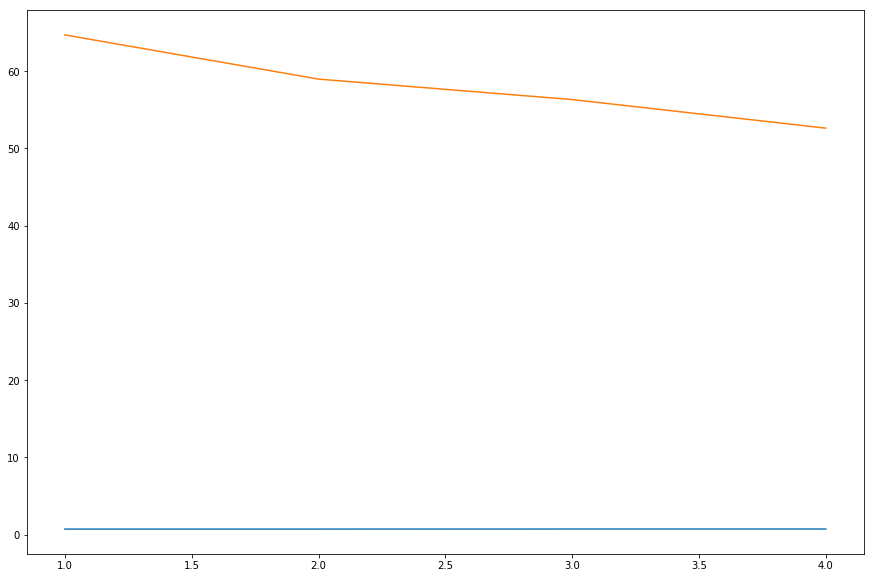

In [42]:
figure = plt.figure(figsize=(15,10))
adj_R_squared = [0.721, 0.721, 0.729, 0.731]
F_statistics = [64.70, 58.98, 56.33, 52.63]
index = list(range(1,5))
plt.plot(index, adj_R_squared )
plt.plot(index, F_statistics)
plt.show()

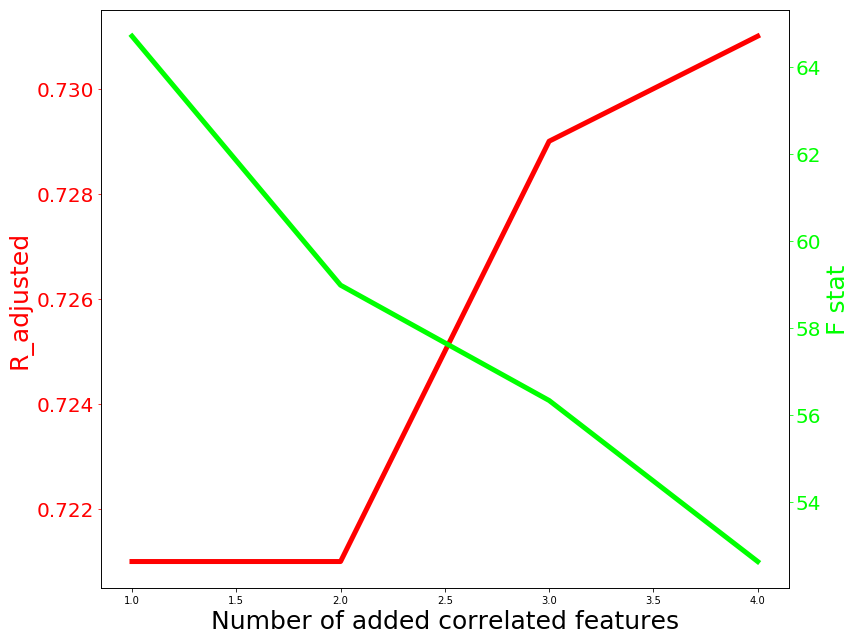

In [52]:
# option 2
fig, ax1 = plt.subplots(1,1,figsize=(12,9))

ax1.plot(index, adj_R_squared, 'red', linestyle='-', label='R_adj', linewidth=5)
ax1.set_xlabel('Number of added correlated features', fontsize=25)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('R_adjusted', color='r',fontsize=25)
ax1.tick_params('y', colors='r', labelsize=20)

ax2 = ax1.twinx()
ax2.plot(index, F_statistics, 'lime', linestyle='-', label='F_Stat', linewidth=5)
ax2.set_ylabel('F stat', color='lime',fontsize=25)
ax2.tick_params('y', colors='lime', labelsize=20)



fig.tight_layout()
plt.savefig(PATH_MULTICOL_PLOTS+'R_adjF_stat.png', bbox_inches='tight')
plt.show()

## BOOTSTRAP METHOD BASED ON RESIDUALS

In [54]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_body, test_size=0.2)

In [58]:
df_feat_train = df_train.drop('density', axis = 1)
df_y_train = df_train['density']


df_feat_test = df_test.drop('density', axis = 1)
df_y_test = df_test['density']

In [72]:
## Step 1: create m bootstrap samples on the training data 


type(df_feat_train)







pandas.core.frame.DataFrame

In [68]:
!pip install resample

  Running setup.py bdist_wheel for resample: started
  Running setup.py bdist_wheel for resample: finished with status 'done'
  Stored in directory: C:\Users\Mous\AppData\Local\pip\Cache\wheels\1f\44\b8\a38fa9bc66a4438eb91a6c01ba56490bfc6df550c99f1d081f
Successfully built resample


You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [81]:
df_feat_train.join(df_y).columns

Index(['age', 'weight', 'height', 'neck', 'chest', 'abdomen', 'hip', 'thigh',
       'knee', 'ankle', 'biceps', 'forearm', 'wrist', 'density'],
      dtype='object')

In [86]:
df_feat_train.shape

(198, 13)

In [116]:
from resample.bootstrap import bootstrap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def fitreg(df):
    
    df = pd.DataFrame(df, columns = df_feat_train.join(df_y).columns)
    y = df['density']
    reg = LinearRegression(fit_intercept=True)
    df = df.drop('density', axis = 1)
    X_features = normalize_data(df)
    
    
    reg.fit(X_features.values, y.values)
    
    coefs = reg.coef_
    
    intercept = np.array([reg.intercept_])
    coefs_total = np.concatenate((coefs,intercept), axis = 0)
    return coefs_total
    #return df


boot_coef = bootstrap(a=df_feat_train.join(df_y).values, f=fitreg, b=100)

In [125]:
boot_coef[:,0].shape

(100,)

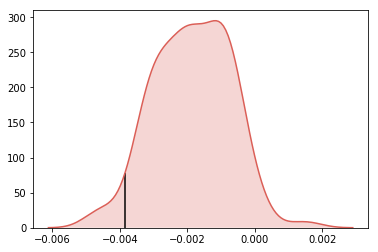

In [123]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("hls", 1)
data = boot_coef[:,0]
p=sns.kdeplot(data, shade=True)

x,y = p.get_lines()[0].get_data()

#care with the order, it is first y
#initial fills a 0 so the result has same length than x
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.05).argmin()

x_median = x[nearest_05]
y_median = y[nearest_05]

plt.vlines(x_median, 0, y_median)
plt.show()

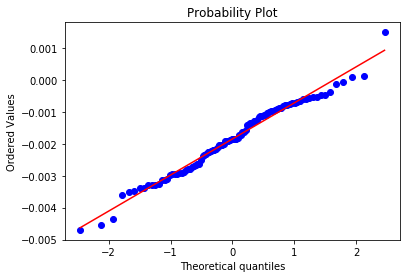

In [136]:
from scipy import stats
res = stats.probplot(data, plot=plt)

In [139]:
data

array([-2.83227167e-03, -2.37835490e-03, -2.19270662e-03, -9.41408852e-04,
       -3.28025539e-03, -1.25467363e-03, -3.27606860e-03, -1.27536875e-03,
       -8.93575751e-04, -9.83316449e-04, -3.49049223e-03, -1.58267247e-03,
       -1.90109448e-03, -7.84479424e-04, -2.64029529e-03, -9.97991466e-04,
       -2.18879752e-03, -2.93934219e-03, -2.09300922e-03, -2.73125420e-03,
        1.22467638e-04, -2.96305124e-03, -1.39142017e-03, -1.12656375e-03,
       -9.62006808e-04, -6.71843210e-04, -3.26022274e-03, -1.29062556e-03,
       -2.21524407e-03, -1.85158144e-03, -1.91138920e-03, -1.81548974e-03,
       -2.92482040e-03, -1.36131617e-03, -7.47289561e-04, -5.87989499e-04,
       -2.90083949e-03, -1.86603711e-03, -3.38896216e-03, -6.49551715e-05,
       -3.09282417e-03, -1.99369256e-03, -5.76321687e-04, -8.95070683e-04,
       -3.38297657e-03, -1.71904987e-03, -1.84025716e-03, -3.14077484e-03,
       -3.61421351e-03, -1.08488862e-03, -2.79703224e-03, -1.10590099e-03,
       -1.91435543e-03, -

In [138]:
res

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

In [135]:
y.shape

(128,)

In [115]:
df_feat_norm.shape

(248, 13)

In [102]:
a = np.array([ 0.000205  ,  0.00490909,  0.00136072,  0.00274252,  0.00065317,
       -0.02608436,  0.00757293, -0.00027059, -0.00200197, -0.00069322,
       -0.00471942, -0.00171357,  0.00454154])

b = np.array([1.0551171717171717])

np.concatenate((a,b),axis = 0)

array([ 2.05000000e-04,  4.90909000e-03,  1.36072000e-03,  2.74252000e-03,
        6.53170000e-04, -2.60843600e-02,  7.57293000e-03, -2.70590000e-04,
       -2.00197000e-03, -6.93220000e-04, -4.71942000e-03, -1.71357000e-03,
        4.54154000e-03,  1.05511717e+00])

In [79]:
df_feat_train.join(df_y).values

array([[ 35.    , 152.25  ,  67.75  , ...,  27.4   ,  17.7   ,   1.0926],
       [ 44.    , 187.5   ,  72.25  , ...,  28.6   ,  18.    ,   1.0575],
       [ 54.    , 202.5   ,  70.75  , ...,  28.8   ,  18.2   ,   1.028 ],
       ...,
       [ 40.    , 159.25  ,  69.75  , ...,  26.4   ,  17.4   ,   1.0713],
       [ 45.    , 135.75  ,  68.5   , ...,  25.5   ,  16.3   ,   1.0678],
       [ 51.    , 149.25  ,  69.75  , ...,  26.3   ,  17.8   ,   1.0678]])

In [63]:
[1 for i in range(df_feat_norm.shape[0])]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [132]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [130]:
df_feat_norm.drop('chest', axis = 1).tail(5)

,age,weight,height,neck,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
243,1.991605,-1.522829,-1.274438,-1.279591,-0.832631,-1.554651,-1.878749,-1.568625,-0.946177,-2.208266,-1.465471,0.295529
244,2.149760,0.754666,-0.208630,1.191572,1.152072,0.652045,0.038657,0.927487,0.052092,0.959821,-0.034229,2.017492
245,2.149760,0.268459,-1.662005,0.367851,1.754902,0.258494,0.172876,-0.528579,-0.946177,-0.327215,-0.725173,-0.242585
246,2.149760,0.404938,0.082045,0.367851,0.808922,-0.289666,-0.651609,1.260302,-0.241517,-0.591222,0.360597,1.694624
247,2.307915,0.976445,-0.111738,1.150386,1.476673,1.017486,-0.018865,1.509913,0.874195,0.464807,0.656716,2.878474


In [138]:
df_feat_norm['neck'].std()

0.9999999999999993

In [121]:
df_feat_norm.tail(5)

,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
243,1.991605,-1.522829,-1.274438,-1.279591,-1.384161,-0.832631,-1.554651,-1.878749,-1.568625,-0.946177,-2.208266,-1.465471,0.295529
244,2.149760,0.754666,-0.208630,1.191572,0.911853,1.152072,0.652045,0.038657,0.927487,0.052092,0.959821,-0.034229,2.017492
245,2.149760,0.268459,-1.662005,0.367851,1.221160,1.754902,0.258494,0.172876,-0.528579,-0.946177,-0.327215,-0.725173,-0.242585
246,2.149760,0.404938,0.082045,0.367851,0.888060,0.808922,-0.289666,-0.651609,1.260302,-0.241517,-0.591222,0.360597,1.694624
247,2.307915,0.976445,-0.111738,1.150386,1.375814,1.476673,1.017486,-0.018865,1.509913,0.874195,0.464807,0.656716,2.878474


In [ ]:
## hip  && weight: Cov_normalized( hip, weight ) = 0.94 
feat_other_abdomen = 


In [93]:
feat_chest.reshape(-1,1)

array([[-9.20199411e-01],
       [-8.60717200e-01],
       [-5.98995467e-01],
       [ 1.14791075e-01],
       [-4.20548832e-01],
       [ 4.35995019e-01],
       [ 5.07373673e-01],
       [-1.46930657e-01],
       [ 7.72309364e-03],
       [-1.46930657e-01],
       [ 7.91017479e-02],
       [ 3.28927038e-01],
       [ 1.38583960e-01],
       [ 3.88409250e-01],
       [ 5.53088631e-02],
       [-2.06412869e-01],
       [ 1.26687517e-01],
       [ 8.04784733e-01],
       [ 7.09613194e-01],
       [ 6.38234539e-01],
       [ 2.93237711e-01],
       [ 1.25684954e+00],
       [-1.76484682e+00],
       [-1.68157172e+00],
       [-1.26519624e+00],
       [-1.33657489e+00],
       [-1.45553932e+00],
       [-4.08652389e-01],
       [-8.72613642e-01],
       [-4.08652389e-01],
       [-3.98626759e-02],
       [-8.72613642e-01],
       [-9.32095854e-01],
       [ 1.29253887e+00],
       [ 1.92305032e+00],
       [ 2.10149695e+00],
       [ 6.73923866e-01],
       [ 5.66855885e-01],
       [ 4.2

In [ ]:
from sklearn.linear_model import LinearRegression


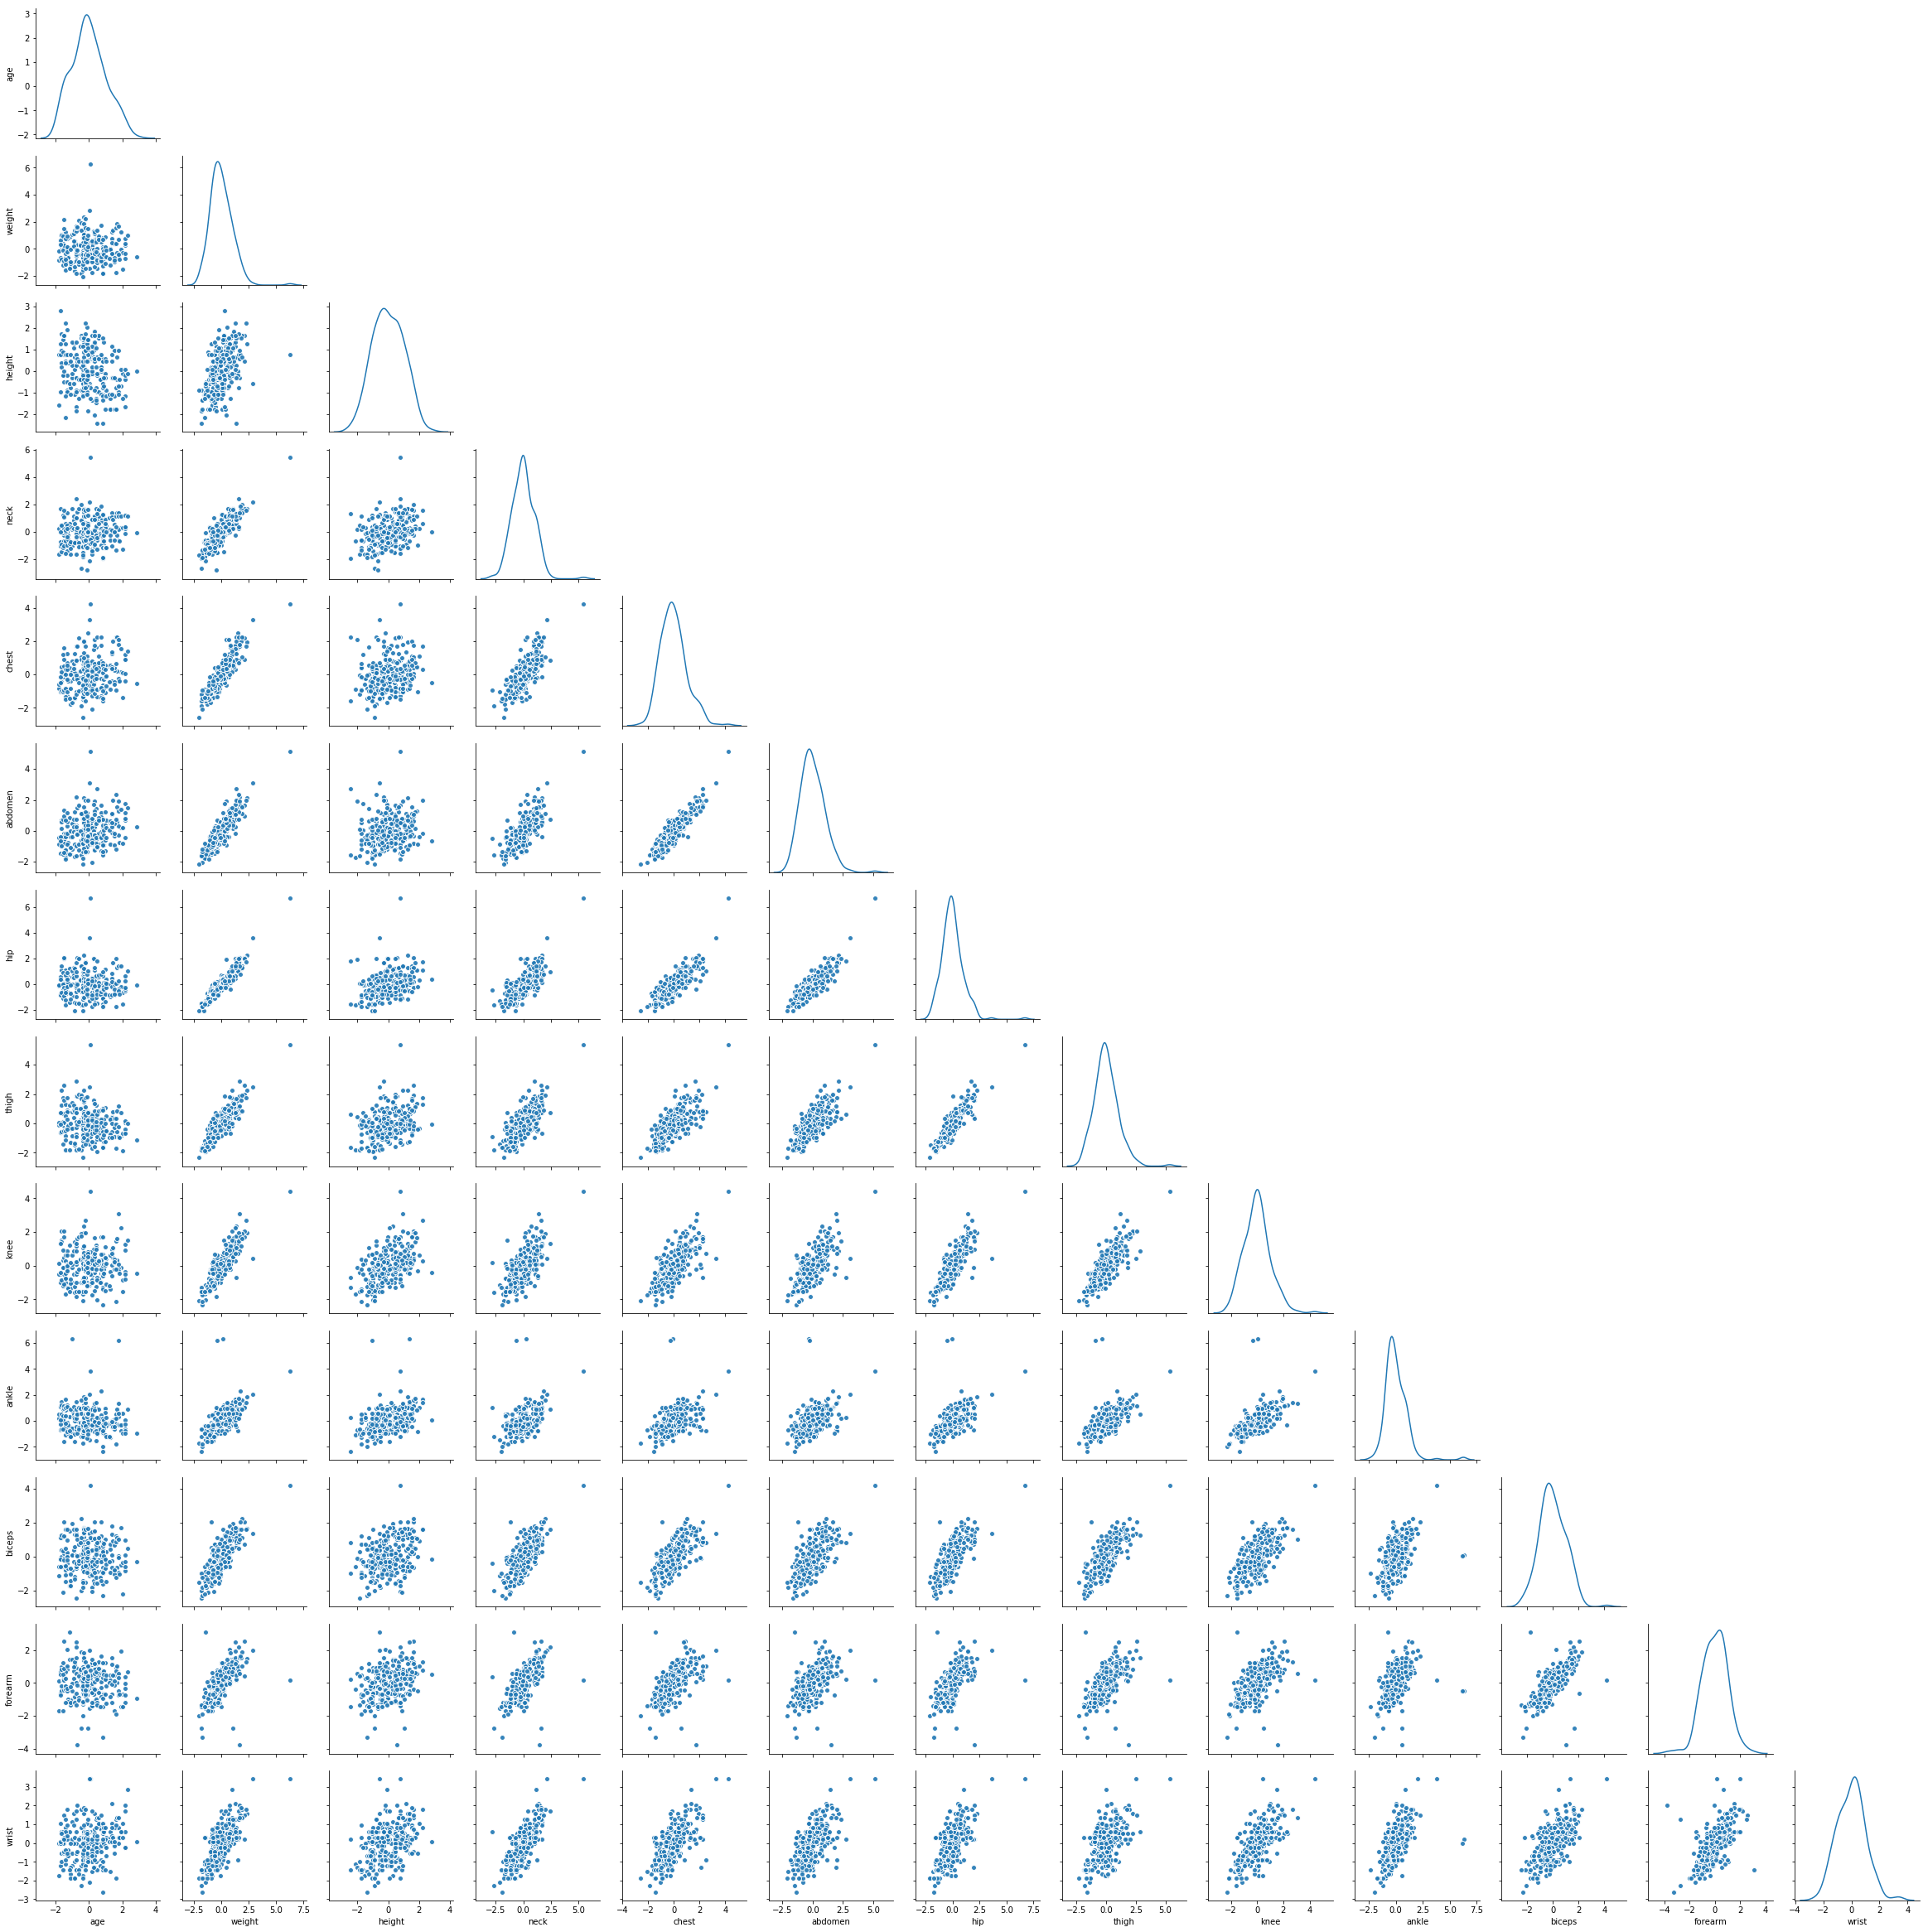

In [123]:
cols = df_feat_norm.columns
#cols = cols.drop('quality')

axPP = sns.pairplot( data = df_feat_norm[cols], plot_kws={'alpha' : 0.9}, diag_kind='kde')
for i, j in zip(*np.triu_indices_from(axPP.axes, 1)):
    axPP.axes[i, j].set_visible(False)
ax.set_title('Pairplot of the data')
plt.show()

In [124]:
df_feat_norm.tail(5)

,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
243,1.991605,-1.522829,-1.274438,-1.279591,-1.384161,-0.832631,-1.554651,-1.878749,-1.568625,-0.946177,-2.208266,-1.465471,0.295529
244,2.149760,0.754666,-0.208630,1.191572,0.911853,1.152072,0.652045,0.038657,0.927487,0.052092,0.959821,-0.034229,2.017492
245,2.149760,0.268459,-1.662005,0.367851,1.221160,1.754902,0.258494,0.172876,-0.528579,-0.946177,-0.327215,-0.725173,-0.242585
246,2.149760,0.404938,0.082045,0.367851,0.888060,0.808922,-0.289666,-0.651609,1.260302,-0.241517,-0.591222,0.360597,1.694624
247,2.307915,0.976445,-0.111738,1.150386,1.375814,1.476673,1.017486,-0.018865,1.509913,0.874195,0.464807,0.656716,2.878474
